### Ciência dos dados [Projeto 3]: PNADC - Uso dos microdados de 2023
### Profa Orientadora: Maria Kelly Venezuela

### Tema escolhido: Uso de variáveis explicativas específicas para estimar o rendimento médio mensal real de um cidadão brasileiro.

### Grupo 8:
    - Guilherme Mitsuo Yabushita Nakama
    - Lina Furukawa Queiroz
    - Lucca de Magalhães Castro Fernandes
    - Maria Clara Hirano Motta
___

In [2]:
import pandas as pd

In [19]:
import numpy as np
import matplotlib.pyplot as plt

___
## Texto introdutório ao trabalho:

#### O objetivo deste projeto é de prever a renda média mensal de um/uma brasileiro/a, baseado em diversas características desta pessoa, como: Escolaridade, cor e raça, idade, sexo e região. Para isso, o grupo fará a utilização de uma base de microdados do PNAD (pesquisa nacional por amostra de domicílios contínua), nesta base, estão disponíveis uma grande quantidade de características dos moradores de cada domicílio, dentre estas características, encontram-se as variáveis features que o grupo utilizará para prever o comportamento da variável target (renda média mensal do cidadão).

#### Para melhor compreender o panorama geral da distribuição de renda no país, o grupo consultou um artigo do Valor Econômico (portal de notícias sobre economia do grupo Globo), intitulado: “Você é rico ou pobre? Confira a calculadora e saiba em que posição está na distribuição de renda no Brasil”. Com a leitura da matéria, pode-se observar que em 2023, metade da população brasileira possuía uma renda per capita de até R$ 1.177,00 por mês. O rendimento médio per capita no país em 2023 foi de aproximadamente: R$ 1.818,00.
	
#### Considerando que o salário mínimo no país era de R$ 1.320,00 em 2023, pode-se concluir que metade da população recebia abaixo do salário mínimo e a média salarial per capita do país está próximo a esse salário mínimo.







___
### Variável Target: Rendimento médio mensal 



___
### Variáveis explicativas (features): 

- Escolaridade (Qualitativa)

- Cor e raça (Qualitativa)

- Idade (Quantitativa)

- Sexo (Qualitativa)

- Região "UF" (Qualitativa)

- Área (Qualitativa)

- Trabalho (Qualitativa)

___
## Período selecionado:

### Segundo trimestre de 2023.

### Link para base de micro-dados deste período: 




In [5]:
url2 = 'https://www.dropbox.com/scl/fi/kvhduq8ocy2o1yj4l0ycc/pnad23_2.csv?rlkey=ni8nhwkv84xg59mp1cnd4gsto&st=yr8uiq5k&dl=1'


___


## Amostra geral da base de micro-dados utilizada para melhor compreensão:

### Abaixo segue uma demonstração de como está inicialmente organizada a base de microdados. O objetivo desta primeira exibição da base de microdados é de facilitar a compreensão do leitor sobre as manipulações e análises exploratórias que serão feitas.

In [6]:
pnad23_2_all = pd.read_csv(url2)
pnad23_2_all

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,2023,2,11,11.0,NaN,110000016,1110011,1,10,3,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
1,2023,2,11,11.0,NaN,110000016,1110011,1,10,3,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
2,2023,2,11,11.0,NaN,110000016,1110011,2,10,3,...,217.964623,98.704681,108.979781,230.958261,0.000000,0.000000,248.378245,0.000000,0.0,111.051514
3,2023,2,11,11.0,NaN,110000016,1110011,3,10,3,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
4,2023,2,11,11.0,NaN,110000016,1110011,3,10,3,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474570,2023,2,53,53.0,NaN,530060880,5310111,13,11,1,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474571,2023,2,53,53.0,NaN,530060880,5310111,13,11,1,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474572,2023,2,53,53.0,NaN,530060880,5310111,14,11,1,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000
474573,2023,2,53,53.0,NaN,530060880,5310111,14,11,1,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000


___
## Filtragem das variáveis explicativas (features):

### Para atingir o objetivo de estimar a renda média mensal de um cidadão a partir das variáveis (features) selecionadas destas pessoas, o grupo inicialmente filtrou a base de microdados para que fossem guardados os valores em tabela apenas das variáveis (features) selecionadas. Como são muitos dados disponíveis para consulta, caso isso não fosse feito, a base de dados ficaria pesada e poluída, dificultando assim a organização e a análise exploratória destes dados. 

### Além disso, os títulos das colunas desta base de micro-dados, são codificados e não são de fácil compreensão, por exemplo: A variável idade na base dados é identificada como "V2009", cor ou raça é identificada como "V2010" e Sexo é identificado por "V2007". Esta codificação de informações torna a compreensão do conjunto de micro-dados mais difícil. Sendo assim, o grupo utilizou a função "rename" para renomear as colunas e tornar a base de microdados mais fácil de ser interpretada. 




In [10]:
# Colunas selecionadas:
colunas = ['Ano',
           'Trimestre',
           'UF',    # Estado
           'V1022', # Situação do domicílio
           'V2007', # Sexo
           'V2009', # Idade
           'V2010', # Cor ou raça
           'V3009A', # Nível de instrução mais elevado alcançado
           'V4012', # Posição ocupada no trabalho principal
           'V403312',] # Rendimento bruto mensal

# Leitura da base de dados filtrando apenas as colunas contidas na lista 'colunas'
pnad23_2_small = pd.read_csv(url2, usecols=colunas)

# Renomeando as colunas para facilitar a compreensão
pnad23_2_small.rename(columns={'V1022':'Area',
                               'V2007':'Sexo',
                               'V2009':'Idade',
                               'V2010':'Cor_Raca',
                               'V3009A':'Escolaridade',
                               'V4012':'Trabalho',
                               'V403312':'Renda'}, inplace=True)
pnad23_2_small

,Ano,Trimestre,UF,Area,Sexo,Idade,Cor_Raca,Escolaridade,Trabalho,Renda
0,2023,2,11,1,1,30,4,10.0,6.0,5000.0
1,2023,2,11,1,2,29,4,10.0,NaN,NaN
2,2023,2,11,1,2,50,4,12.0,4.0,3500.0
3,2023,2,11,1,2,25,4,10.0,NaN,NaN
4,2023,2,11,1,2,2,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
474570,2023,2,53,1,1,38,1,13.0,3.0,10000.0
474571,2023,2,53,1,2,30,1,NaN,3.0,2500.0
474572,2023,2,53,1,1,51,1,12.0,3.0,5000.0
474573,2023,2,53,1,2,56,1,12.0,4.0,5000.0


___

### Alteração da descrição da categoria das variáveis qualitativas 

#### Variáveis qualitativas são variáveis que não possuem um valor númerico, são normalmente utilizadas para definir rótulos. Entretanto, na base de micro-dados analisada, o conteúdo das colunas de variáveis qualitativas está preenchido com números, o que dificulta a compreensão de cada elemento da coluna. Por exemplo: Na coluna "Sexo", homem está definido como "1" e mulher esta definido como "2", quando na realidade homens deveriam estar definidos como "Homem" e mulheres como "Mulher". Sendo assim, o grupo fez a utilização da função "rename_categories" em todas as variáveis qualitativas que estavam representadas com números , para que estas fossem representadas com rótulos. 

#### UF (Estado da Residência)

In [11]:
pnad23_2_small.UF = pnad23_2_small.UF.astype('category')
pnad23_2_small.UF = pnad23_2_small.UF.cat.rename_categories({11:'Rondônia',
                                                             12:'Acre',
                                                             13:'Amazonas',
                                                             14:'Roraima',
                                                             15:'Pará',
                                                             16:'Amapá',
                                                             17:'Tocantins', 
                                                             21:'Maranhão',
                                                             22:'Piauí',
                                                             23:'Ceará',
                                                             24:'Rio Grande do Norte',
                                                             25:'Paraíba',
                                                             26:'Pernambuco',
                                                             27:'Alagoas',
                                                             28:'Sergipe',
                                                             29:'Bahia',
                                                             31:'Minas Gerais',
                                                             32:'Espírito Santo',
                                                             33:'Rio de Janeiro',
                                                             35:'São Paulo',
                                                             41:'Paraná',
                                                             42:'Santa Catarina',
                                                             43:'Rio Grande do Sul',
                                                             50:'Mato Grosso do Sul',
                                                             51:'Mato Grosso',
                                                             52:'Goiás',
                                                             53:'Distrito Federal',})
pnad23_2_small.UF.value_counts(True).round(3)*100

São Paulo              7.8
Minas Gerais           7.4
Rio de Janeiro         7.1
Maranhão               6.5
Santa Catarina         6.4
Paraná                 5.3
Rio Grande do Sul      5.3
Bahia                  4.8
Ceará                  4.7
Alagoas                4.2
Pernambuco             4.1
Pará                   3.7
Espírito Santo         3.6
Goiás                  3.3
Amazonas               3.0
Mato Grosso            2.7
Paraíba                2.6
Piauí                  2.3
Mato Grosso do Sul     2.2
Rio Grande do Norte    2.0
Acre                   2.0
Distrito Federal       1.9
Sergipe                1.9
Rondônia               1.7
Tocantins              1.5
Roraima                1.2
Amapá                  0.9
Name: UF, dtype: float64

#### Área de Residência

In [12]:
pnad23_2_small.Area = pnad23_2_small.Area.astype('category')
pnad23_2_small.Area = pnad23_2_small.Area.cat.rename_categories({1:'Urbana',
                                                                 2:'Rural'})
pnad23_2_small.Area.value_counts(True).round(3)*100

Urbana    73.4
Rural     26.6
Name: Area, dtype: float64

#### Sexo

In [13]:
pnad23_2_small.Sexo = pnad23_2_small.Sexo.astype('category')
pnad23_2_small.Sexo = pnad23_2_small.Sexo.cat.rename_categories({1:'Homem', 2:'Mulher'})
pnad23_2_small.Sexo.value_counts(True).round(3)*100

Mulher    51.6
Homem     48.4
Name: Sexo, dtype: float64

#### Cor e Raça

In [14]:
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.astype('category')
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.cat.rename_categories({1:'Branca',
                                                                         2:'Preta',
                                                                         3:'Amarela',
                                                                         4:'Parda',
                                                                         5:'Indígena',
                                                                         9:'Ignorado'})
pnad23_2_small.Cor_Raca.value_counts(True).round(3)*100

Parda       49.8
Branca      39.4
Preta        9.7
Amarela      0.6
Indígena     0.6
Ignorado     0.0
Name: Cor_Raca, dtype: float64

#### Escolaridade

In [15]:
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.astype('category')
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.cat.rename_categories({1:'Creche',
                                                                                 2:'Pré-escola',
                                                                                 3:'Classe de alfabetização',
                                                                                 4:'Alfabetização de adultos',
                                                                                 5:'Antigo primário (elementar)',
                                                                                 6:'Antigo ginásio (médio 1º ciclo)',
                                                                                 7:'Regular do ensino fundamental ou do 1º grau',
                                                                                 8:'Educação de jovens e adultos (EJA) ou supletivo do 1º grau',
                                                                                 9:'Antigo científico, clássico, etc. (médio 2º ciclo)',
                                                                                 10:'Regular do ensino médio ou do 2º grau',
                                                                                 11:'Educação de jovens e adultos (EJA) ou supletivo do 2º grau',
                                                                                 12:'Superior - graduação',
                                                                                 13:'Especialização de nível superior',
                                                                                 14:'Mestrado',
                                                                                 15:'Doutorado',
                                                                                 '':'Não aplicável'})
pnad23_2_small.Escolaridade.value_counts(True).round(3)*100

Regular do ensino médio ou do 2º grau                         36.0
Regular do ensino fundamental ou do 1º grau                   27.1
Superior - graduação                                          13.8
Antigo primário (elementar)                                   10.4
Especialização de nível superior                               3.7
Classe de alfabetização                                        1.9
Antigo ginásio (médio 1º ciclo)                                1.7
Educação de jovens e adultos (EJA) ou supletivo do 2º grau     1.5
Antigo científico, clássico, etc. (médio 2º ciclo)             1.1
Educação de jovens e adultos (EJA) ou supletivo do 1º grau     1.1
Mestrado                                                       0.6
Alfabetização de adultos                                       0.5
Pré-escola                                                     0.3
Doutorado                                                      0.3
Name: Escolaridade, dtype: float64

#### Posição de Trabalho

In [16]:
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.astype('category')
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.cat.rename_categories({1:'Trabalhador doméstico',
                                                                         2:'Militar do exército',
                                                                         3:'Empregado do setor privado',
                                                                         4:'Empregado do setor público',
                                                                         5:'Conta própria',
                                                                         6:'Empregador',
                                                                         7:'Trabalhador não remunerado',
                                                                         '':'Não aplicável',})
pnad23_2_small.Trabalho.value_counts(True).round(3)*100

Empregado do setor privado    45.1
Empregador                    28.2
Empregado do setor público    13.0
Trabalhador doméstico          6.3
Conta própria                  4.0
Trabalhador não remunerado     2.6
Militar do exército            0.8
Name: Trabalho, dtype: float64

### Interpretação da base de microdados organizada e categorizada corretamente:



#### Com as informações devidamente categorizadas, não só a interpretação da base de microdados foi facilitada, mas também agora se tornou possível realizar uma análise exploratória destes microdados e com isso, pode-se estabelecer relações entre a variável target (quantitativa) e as demais variáveis explicativas.

#### Este foi o resultado de como ficou a base de dados após ter sido feito a correta categorização de cada informação:


In [17]:
pnad23_2_small

,Ano,Trimestre,UF,Area,Sexo,Idade,Cor_Raca,Escolaridade,Trabalho,Renda
0,2023,2,Rondônia,Urbana,Homem,30,Parda,Regular do ensino médio ou do 2º grau,Empregador,5000.0
1,2023,2,Rondônia,Urbana,Mulher,29,Parda,Regular do ensino médio ou do 2º grau,NaN,NaN
2,2023,2,Rondônia,Urbana,Mulher,50,Parda,Superior - graduação,Empregado do setor público,3500.0
3,2023,2,Rondônia,Urbana,Mulher,25,Parda,Regular do ensino médio ou do 2º grau,NaN,NaN
4,2023,2,Rondônia,Urbana,Mulher,2,Parda,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
474570,2023,2,Distrito Federal,Urbana,Homem,38,Branca,Especialização de nível superior,Empregado do setor privado,10000.0
474571,2023,2,Distrito Federal,Urbana,Mulher,30,Branca,NaN,Empregado do setor privado,2500.0
474572,2023,2,Distrito Federal,Urbana,Homem,51,Branca,Superior - graduação,Empregado do setor privado,5000.0
474573,2023,2,Distrito Federal,Urbana,Mulher,56,Branca,Superior - graduação,Empregado do setor público,5000.0


___

### Explicação variáveis quantitativas e coeficientes de correlação


#### Variáveis quantitativas são aquelas que possuem um valor númerico que permite que sejam feitas operações matemáticas com outras varáveis quantitativas, além disso, com variáveis deste tipo é possível extrair coeficientes de correlação que são fundamentais para compreender as relações entre diferentes variáveis quantitativas. Com estes coeficientes é possível classificar a relação entre estas variáveis como diretamente proporicionais, inversamente proporcionais, ou isoladas. Caso este coeficiente seja maior que zero, serão diretamente proporcionais, menor que zero, inversamente proporcionais e igual a zero, isoladas (o valor de uma variável não interfere no da outra).

### Análise exploratória dos dados obtidos

#### Agora, com a base de microdados organizada e categorizada corretamente, o grupo irá fazer a análise exploratória dos dados. Esta análise consiste em realizar o cruzamento de dados entre a variável target (renda média mensal) com as demais variáveis explicativas. A partir deste cruzamento de dados, é possível construir gráficos de diferentes formatos e extrair coeficientes de correlação entre variáveis quantitativas. Os resultados desta análise exploratória de dados são fundamentais para prever o comportamento da variável target em diferentes cenários, considerando os valores das variáveis explicativas selecionadas.

#### A depender do tipo das variáveis que estão sendo relacionadas, existem modelos de gráficos específicos que devem ser utilizados para cada uma. Quando a relação é entre duas variáveis quantitativas, deve-se utilizar os gráficos de dispersão, quando ambas são qualitativas, deve-se utilizar os gráficos de barras "stacked" e por fim, quando se trata de uma variável quantitativa e uma qualitativa, deve-se utilizar os gráficos do tipo Histograma ou Boxplot.

<Figure size 1500x800 with 0 Axes>

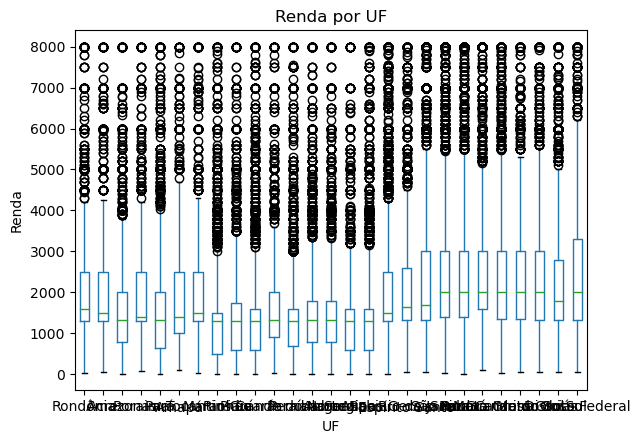

<Figure size 1500x800 with 0 Axes>

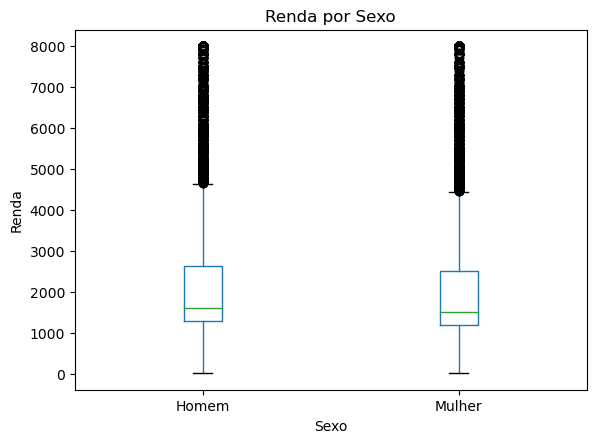

<Figure size 1500x800 with 0 Axes>

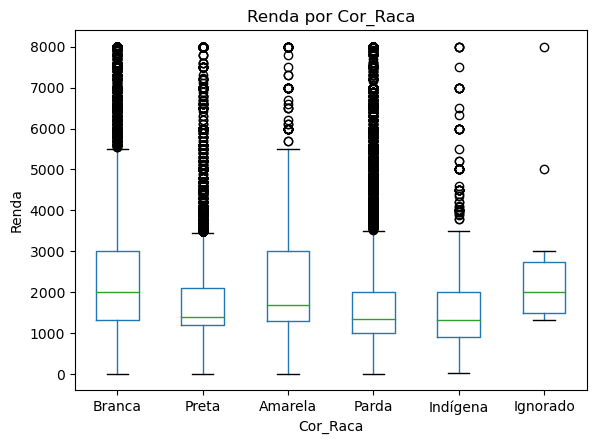

<Figure size 1500x800 with 0 Axes>

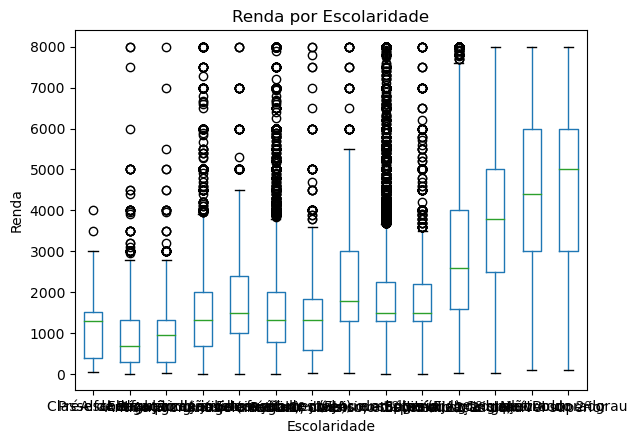

<Figure size 1500x800 with 0 Axes>

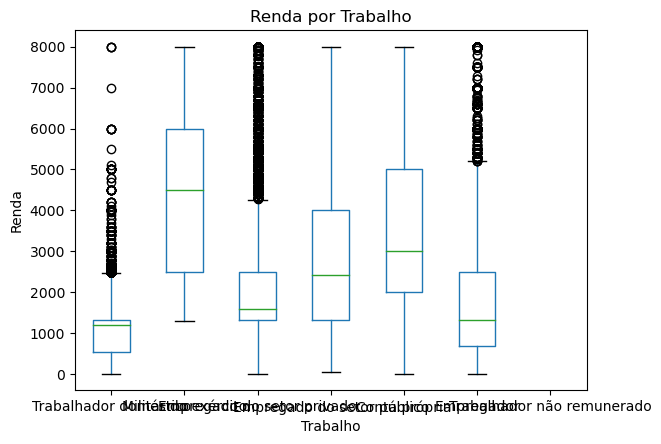

<Figure size 1500x800 with 0 Axes>

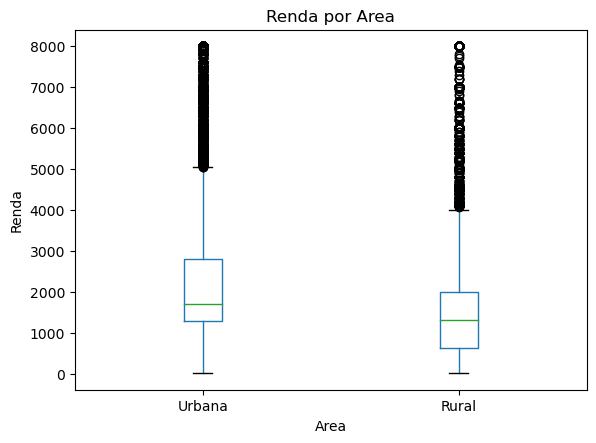

In [24]:
# Definição da função auxiliar para boxplots com limitação de faixa de renda
def boxplot_renda_por_variavel(df, variavel, limite):
    plt.figure(figsize=(15, 8))

    # Filtra os dados para excluir valores acima do limite superior
    df_filtrado = df[df.Renda <= limite]

    df_filtrado.boxplot(column='Renda', by=variavel, grid=False)
    plt.title(f'Renda por {variavel}')
    plt.suptitle('')
    plt.xlabel(variavel)
    plt.ylabel('Renda')
    plt.show()

# Encontrando o limite superior baseado no 95º percentil da renda
limite_95 = pnad23_2_small.Renda.quantile(0.95)

# Chamar a função para cada variável categórica com o limite superior definido
variaveis = ['UF','Sexo', 'Cor_Raca', 'Escolaridade', 'Trabalho', 'Area']
for variavel in variaveis:
    boxplot_renda_por_variavel(pnad23_2_small, variavel, limite_95)

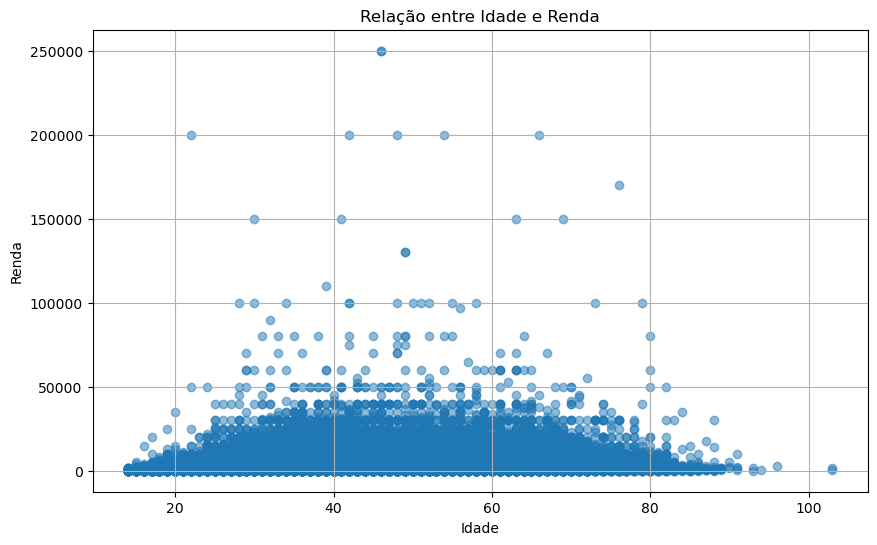

0.11012825813491457


In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(pnad23_2_small.Idade, pnad23_2_small.Renda, alpha=0.5)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.grid(True)
plt.show()

coef_correlacao = pnad23_2_small.Idade.corr(pnad23_2_small.Renda)

print(coef_correlacao)

## Interpretação dos gráficos:

### Renda X UF (estado): 

#### Neste gráfico é possível observar que segundo os dados analisados deste período,



### Renda X Sexo: 

#### Neste gráfico é possível observar que segundo os dados analisados deste período, os homens ganham ligeiramente mais do que as mulheres. Ou seja, a variável explicativa "Sexo" possui influência sobre a variável target (renda média mensal).


### Renda X Raça/cor: 

#### Neste gráfico é possível observar que segundo os dados analisados deste período, pessoas de cor de pele branca possuem uma renda média mensal maior quando comparado a indíviduos com as demais cores de pele. Em segundo lugar, encontram-se as pessoas de cor de pele amarela. Em terceiro, as pessoas de cor de pele preta e por último empatados, ficam os indígenas e pardos. Ou seja, a variável explicativa "Raça/cor" possui influência sobre a variável target (renda média mensal).


### Renda X Área: 

#### Neste gráfico é possível observar que segundo os dados analisados deste período, cidadãos residentes em áreas urbanas possuem uma renda média mensal maior quando comparado a indivíduos que residem em zonas rurais. Ou seja, a variável explicativa "Área" possui influência sobre a variável target (renda média mensal).

### Renda X Idade: 

#### Com a análise do gráfico e do coeficiente de correlação, é possível observar que segundo os dados analisados deste período, cidadãos com uma maior idade tendem a possuir uma renda média mensal superior a pessoas mais jovens. Entretanto, a renda média mensal tem um declínio exponenecial após os 60 anos de idade. 




